In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("C://Users//yoona//Desktop//drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


C:\Users\yoona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

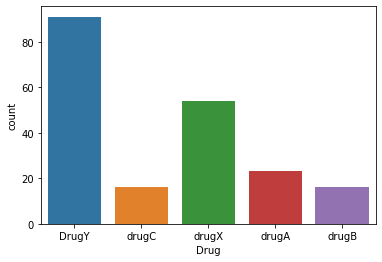

In [3]:
import seaborn as sns
sns.countplot(df['Drug'])

In [6]:
# object (문자)로 되어있는 feature 값들을 0과 1의 숫자로 바꿔준다.
# https://devuna.tistory.com/67

df_dummies=pd.get_dummies(df,columns=['Sex','BP','Cholesterol'])
df_dummies

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [7]:
def multi(name):
    Drug_cat=1
    if name=='DrugY':
        Drug_cat=0
    elif name=='drugC':
        Drug_cat=1
    elif name=='drugX':
        Drug_cat=2
    elif name == 'drugB':
        Drug_cat=3
    elif name == 'drugA':
        Drug_cat=4
    return Drug_cat


df_dummies['Drug_number']=df_dummies['Drug'].apply(multi)           # 함수에 넣어 숫자로 변환해준다.
df_dummies

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_number
0,23,25.355,DrugY,1,0,1,0,0,1,0,0
1,47,13.093,drugC,0,1,0,1,0,1,0,1
2,47,10.114,drugC,0,1,0,1,0,1,0,1
3,28,7.798,drugX,1,0,0,0,1,1,0,2
4,61,18.043,DrugY,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0,1
196,16,12.006,drugC,0,1,0,1,0,1,0,1
197,52,9.894,drugX,0,1,0,0,1,1,0,2
198,23,14.020,drugX,0,1,0,0,1,0,1,2


In [21]:
df_model = df_dummies.drop('Drug',axis=1)            # drop으로 drug 열 (axis = 1)을 제거한다
df_model

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_number
0,23,25.355,1,0,1,0,0,1,0,0
1,47,13.093,0,1,0,1,0,1,0,1
2,47,10.114,0,1,0,1,0,1,0,1
3,28,7.798,1,0,0,0,1,1,0,2
4,61,18.043,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,1
196,16,12.006,0,1,0,1,0,1,0,1
197,52,9.894,0,1,0,0,1,1,0,2
198,23,14.020,0,1,0,0,1,0,1,2


In [24]:
X = df_model.drop('Drug_number', axis = 1)     # 맨 끝에 'Drug number'만 빼고 그 앞에 모든 열을 X값으로 둔다.

# X=df_model[:,:-1]  이렇게 기존에 하던 방식대로 안하는 이유는 .values로 array 값으로 한게 아니라 pandas 데이터 형식이라 기존대로는 못씀

y=df_model.loc[:,'Drug_number']      # y의 경우 행은 다 가져오고, 열은 맨 끝에 한개만 가져오는거라 이렇게 작성 가능
y                                    # y = df_model['Drug_number']로 해줄수도 있다.

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug_number, Length: 200, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X                            #feature 
                                                    , y                          #target
                                                    , stratify = df.iloc[:,-1]   #층화추출법
                                                    , random_state = 1)          #난수고정

print(y_train,'\n')
print(y_test)

17     4
120    0
97     0
191    4
144    4
      ..
104    0
8      0
83     4
198    2
49     0
Name: Drug_number, Length: 150, dtype: int64 

187    4
12     0
44     2
131    0
14     2
176    4
127    2
84     1
34     2
21     0
143    0
40     0
7      1
31     3
146    2
29     0
178    0
86     2
19     0
51     2
30     2
78     4
60     0
63     2
99     0
102    1
26     0
4      0
59     0
139    2
22     0
171    2
11     0
164    0
136    3
177    0
163    0
168    0
172    0
85     3
46     4
79     2
52     0
151    3
153    2
140    4
24     0
75     0
137    4
158    1
Name: Drug_number, dtype: int64


In [38]:
model = RandomForestClassifier(n_estimators=180)   # 트리의 개수 기본은 10개
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
# print(prediction == y_test)            # 예측 결과와 실제 y_test 정답을 비교

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.98


Accuracy is:  0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00         4
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



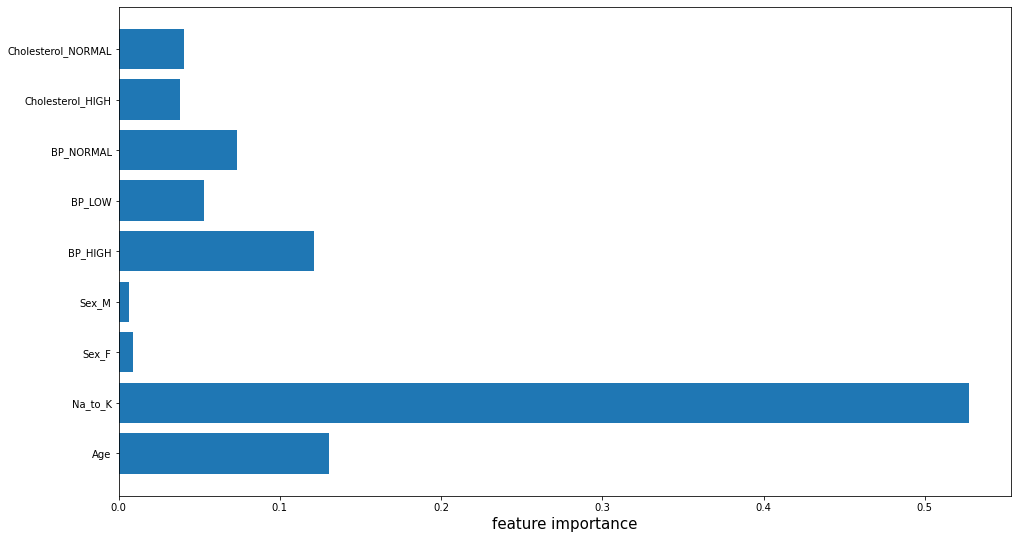

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score            # 그냥 정확도... score랑 동일
from sklearn.metrics import classification_report

print("Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))                      # support는 실제 정답에 해당 클래스가 몇개인지 수 : 1 class가 압도적으로 많다

feature_names = ['Age','Na_to_K','Sex_F','Sex_M','BP_HIGH','BP_LOW','BP_NORMAL','Cholesterol_HIGH','Cholesterol_NORMAL']
n_feature = 9    # 피쳐 갯수
idx = np.arange(n_feature)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

# 확실히 feature간 중요도를 보면 랜덤포레스트에서는 단일 트리보다 훨씬 많은 feature가 0이상의 중요도를 갖는다.
# 랜덤 포레스트의 무작위성은 단일 트리보다 더 넓은 시각에서 데이터를 바라볼 수 있다.

In [39]:
# feature들이 숫자가 아니라서 숫자로 바꾸기 위해 차원을 3차원으로 늘려서 본 feature importance와 그냥 1차원으로 숫자로 대체해서 본 feature importance의 차이가 있다.
# 선형적으로 그냥 위의 Sex_M과 Sex_F를 더한 feature importance가 Sex의 feature importance는 아니다!!
# 3차원으로 늘렸다 함은 BP가 HIGH, NORMAL, LOW 가 있을 때 이거를 0,1,2로 하지 않고, HIGH를 [1,0,0], NORMAL을 [0,1,0], LOW를 [0,0,1]로 설정하는것

print(model.feature_importances_)

[0.13408148 0.51301264 0.00872979 0.00888897 0.11937302 0.0542363
 0.08231452 0.03568767 0.04367561]


Test Accuracy is:  0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00         4
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



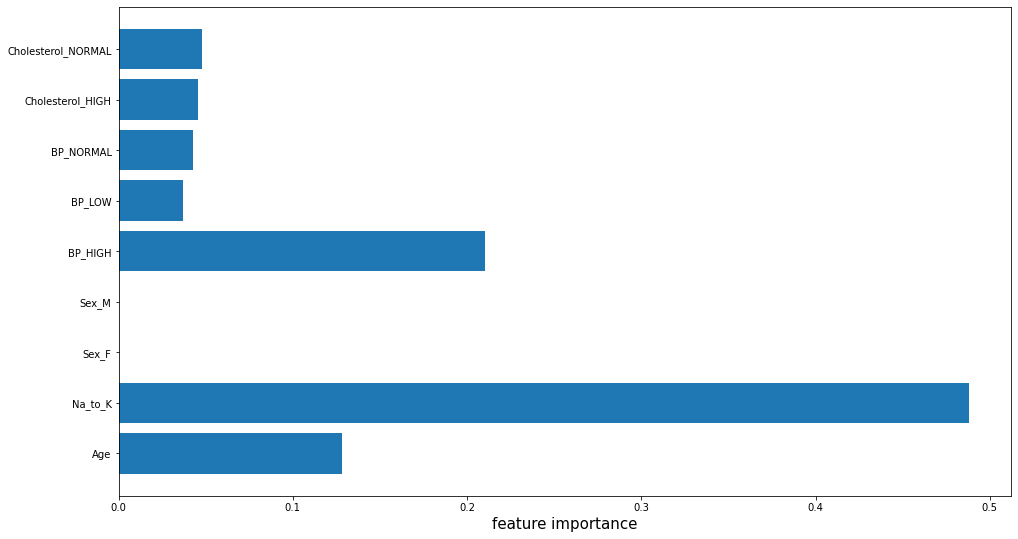

In [41]:
model = RandomForestClassifier(n_estimators=180, max_features = 9,  max_depth = 100)
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
print("Test Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test)) 

model.score(X_test,y_test)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

Confusion matrix, without normalization
[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 1  0 12  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  6]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.08 0.   0.92 0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]


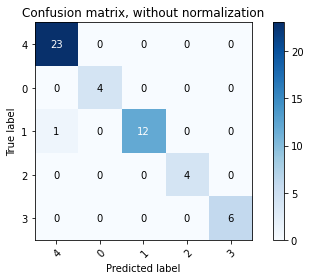

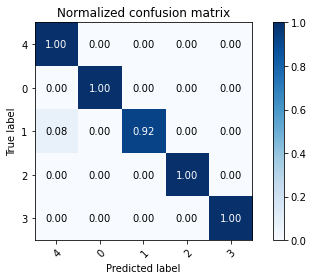

In [42]:
class_names = np.array(['0','1','2','3','4'], dtype='<U10')       # 최종 분류 모델이 1또는 2또는 3임
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Confusion Matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)-1]        # 원래는 없던 건데 -1 해준다
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# 정규화 안한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, title='Confusion matrix, without normalization')

# 정규화 한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()